In [4]:
import torch
from torch import nn

d:\Arvind\pytorch_computer_vision_fashion_MNIST\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

## importing the matplotlib for visualization
import matplotlib.pyplot as plt

## version 
print(f"PyTorch version : {torch.__version__}\ntorchvision version : {torchvision.__version__}")

PyTorch version : 1.11.0+cu115
torchvision version : 0.12.0+cu115


## Getting DataSets

In [6]:
import numpy as np


In [7]:
## Setup the training data
train_data = datasets.FashionMNIST(
    root = "D:\Arvind\pytorch_computer_vision_fashion_MNIST\Data_fasionMNIST",
    train = True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

## Setup testing data
test_data = datasets.FashionMNIST(
    root="D:\Arvind\pytorch_computer_vision_fashion_MNIST\Data_fasionMNIST",
    train=False,
    download=True,
    
    transform=ToTensor()
)

In [8]:
## See tfirst training Sample 
image , label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [9]:
### Shape of the image 
image.shape

torch.Size([1, 28, 28])

In [10]:
## number of sample 
len(train_data.data),len(train_data.targets),len(test_data.data),len(test_data.targets)

(60000, 60000, 10000, 10000)

In [11]:
### Class of data 
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image Shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '0')

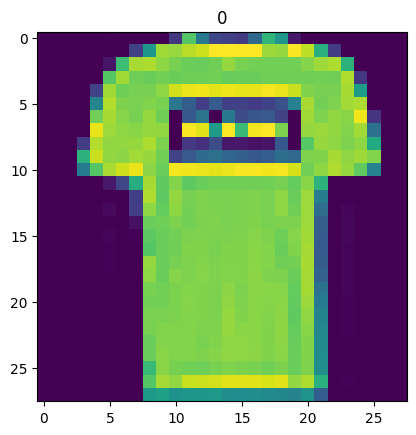

In [12]:
### visualize the data 
image,label = train_data[1]
print(f"Image Shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

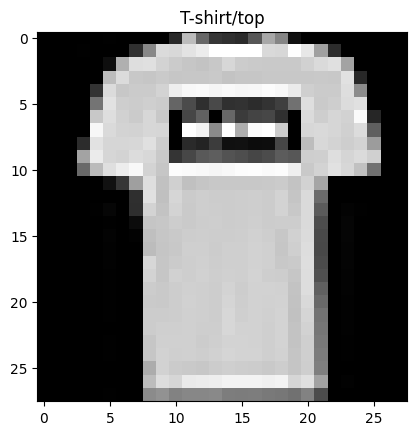

In [13]:
### turn the image into grey scale using 'camp' parameter of plt.imshow()
plt.imshow(image.squeeze(),cmap = "grey")
plt.title(class_names[label]);

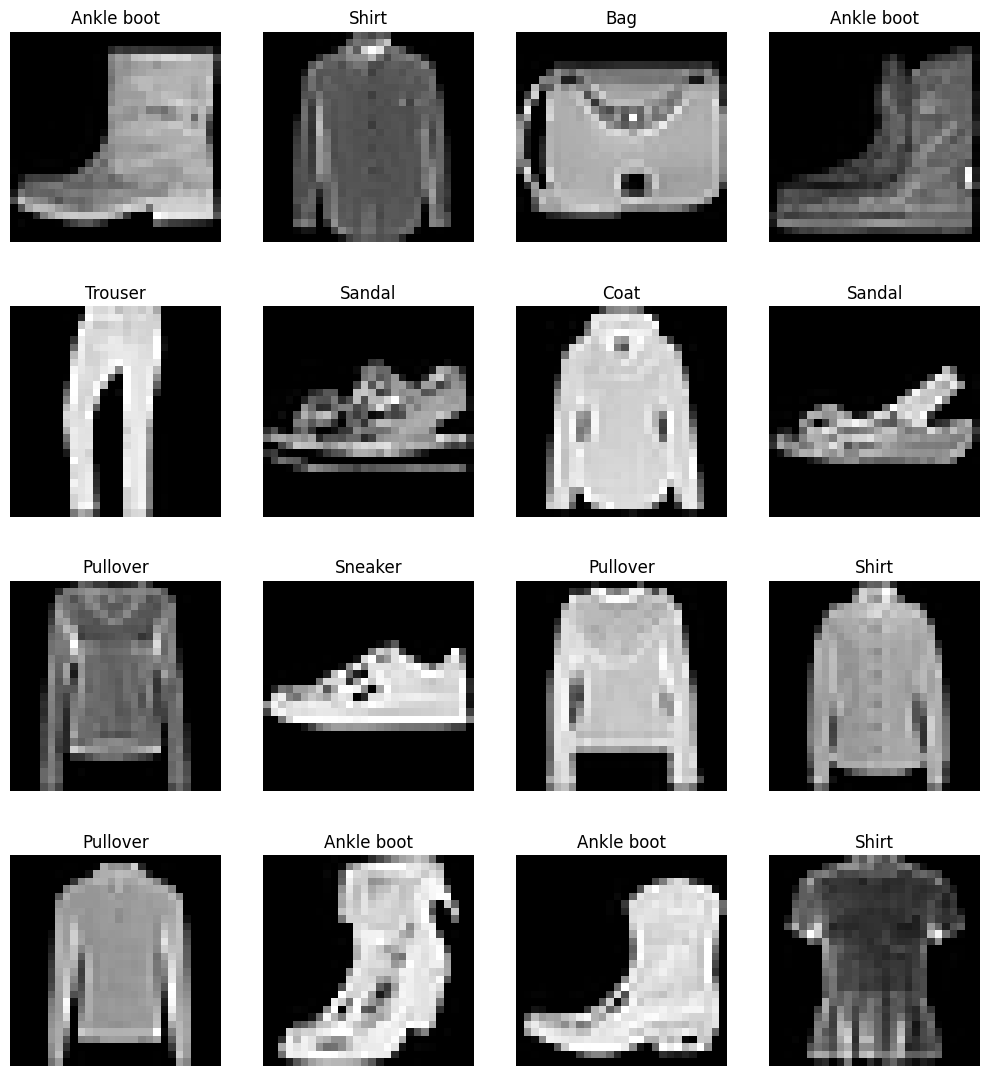

In [14]:
##Ploting the different more image with cmap = grey in plt.imshow() parameters 
torch.manual_seed(42)
torch.cuda.manual_seed(42)
plt.figure(figsize=(10,12))
row , col = 4,4
for i in range(1,row*col+1):
    random_idx = torch.randint(0,len(train_data),size=[1]).item()
    img , label = train_data[random_idx]
    plt.subplot(row,col,i)
    plt.imshow(img.squeeze(),cmap = "grey")
    plt.title(class_names[label]) 
    plt.tight_layout()
    plt.axis(False);
    

## Preparing for DataLoader

In [15]:
from torch.utils.data import DataLoader

## Setup the Batch Size hyperparameter
batch_size = 32

## data into iterable form (batches)
train_dataloader = DataLoader(train_data,
    batch_size = batch_size,
    shuffle=True ## suffle data in epoch
)

test_dataloader = DataLoader(test_data,
    batch_size=batch_size,
    shuffle=False ## not necessary in test data

)


print(f"Dataloaders : {train_dataloader,test_dataloader}")
print(f"length of train Dataloaders : {len(train_dataloader)} batches of {batch_size}")
print(f"length of testDataloaders : {len(test_dataloader)} batches of {batch_size}")


Dataloaders : (<torch.utils.data.dataloader.DataLoader object at 0x000002A7C181DA80>, <torch.utils.data.dataloader.DataLoader object at 0x000002A78A4BDD50>)
length of train Dataloaders : 1875 batches of 32
length of testDataloaders : 313 batches of 32


In [16]:
## train datasets
train_features_batch , train_label_batch = next(iter(train_dataloader))
train_features_batch.shape , train_label_batch.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

###### look once more 

Image size : torch.Size([1, 28, 28])
Label : 6,label size : torch.Size([])


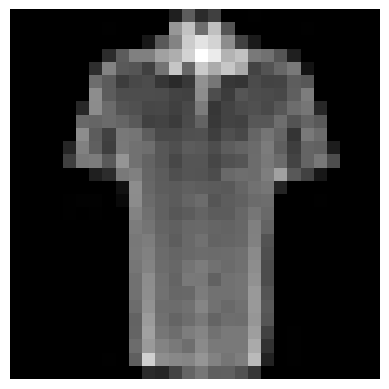

In [17]:
## Show a sample
torch.cuda.manual_seed(42)
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img , label = train_features_batch[random_idx] , train_label_batch[random_idx]
plt.imshow(img.squeeze(),cmap='grey')
plt.axis('off')
print(f"Image size : {img.shape}")
print(f"Label : {label},label size : {label.shape}")

## Model 0: Build a baseline model

In [18]:
## flatten layer 
flatter_model = nn.Flatten()

## get a single sample 
x = train_features_batch[0]

## Flatten the sample 
output = flatter_model(x) ## perform forward pass

## print out 
print(f"Shape before the flattering : {x.shape} -> [colo_channels , height , width]")
print(f"Shape after flattening : {output.shape} -> [color_channel , height*weight ]")

Shape before the flattering : torch.Size([1, 28, 28]) -> [colo_channels , height , width]
Shape after flattening : torch.Size([1, 784]) -> [color_channel , height*weight ]


In [19]:
## Create the  baseline modelmodel 
class fashionMNISTModel(nn.Module):
    def __init__(self,input_shape:int,hidden_unit:int,output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_unit),
            nn.Linear(in_features=hidden_unit,out_features=output_shape)
           

        )
    def forward(self,x):
        return self.layer_stack(x)   


In [20]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0 = fashionMNISTModel(input_shape=784,
    hidden_unit=10,
    output_shape=len(class_names)
)
model_0.to('cpu')

fashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

## Setup the loss , optimizer and evaluation matrics


In [21]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr = 0.1)

def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

train the model on cpu to check how much it take time to train
time is calculated by time funtion 

In [22]:
from timeit import default_timer as timer
def print_train_time(start:float,end:float,device : torch.device=None):
    total_time = end-start
    print(f"train time on {device} :{total_time:.3f} seconds")
    return total_time

## Creating the training loop and training a model on batchs of data

In [23]:
for batch , (X,y) in enumerate(train_dataloader):
    print(f"batch {batch}: {(y)}")

batch 0: tensor([3, 9, 6, 9, 4, 9, 9, 4, 2, 9, 5, 7, 8, 4, 7, 2, 9, 0, 8, 4, 2, 1, 5, 9,
        0, 8, 3, 3, 4, 5, 6, 3])
batch 1: tensor([0, 2, 8, 4, 8, 6, 6, 2, 2, 2, 4, 2, 8, 9, 6, 9, 4, 2, 1, 7, 6, 8, 3, 1,
        1, 1, 5, 0, 4, 5, 4, 5])
batch 2: tensor([3, 2, 7, 9, 1, 7, 2, 0, 6, 3, 5, 6, 5, 7, 2, 4, 5, 1, 8, 4, 1, 2, 7, 6,
        2, 7, 3, 4, 7, 9, 8, 5])
batch 3: tensor([1, 4, 7, 1, 2, 8, 9, 6, 1, 9, 2, 5, 6, 2, 6, 1, 9, 8, 9, 6, 0, 9, 4, 5,
        5, 0, 3, 4, 4, 6, 8, 4])
batch 4: tensor([1, 3, 9, 3, 6, 7, 7, 1, 9, 9, 1, 6, 8, 5, 4, 4, 7, 0, 0, 1, 5, 5, 4, 3,
        3, 2, 8, 6, 4, 1, 6, 2])
batch 5: tensor([7, 2, 9, 8, 0, 9, 6, 5, 6, 5, 2, 8, 5, 1, 6, 4, 3, 7, 3, 4, 0, 5, 1, 5,
        4, 5, 7, 6, 4, 4, 1, 3])
batch 6: tensor([6, 6, 9, 8, 9, 7, 2, 2, 2, 6, 7, 5, 3, 0, 9, 7, 7, 6, 6, 6, 6, 8, 5, 0,
        5, 2, 8, 8, 3, 0, 3, 2])
batch 7: tensor([0, 4, 4, 8, 1, 9, 8, 7, 9, 4, 2, 9, 8, 5, 7, 5, 4, 0, 8, 7, 9, 7, 7, 6,
        7, 1, 4, 4, 3, 6, 2, 6])
batch 8: tensor([0, 5, 2

In [24]:
from tqdm.auto import tqdm
torch.manual_seed(42)
torch.cuda.manual_seed(42)

## set the ti 
train_time_start_on_cpu = timer()
epochs = 6

## creating the traning loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch}\n-------")
    train_loss = 0
    ## loop through the training batches
    for batch , (X,y) in enumerate(train_dataloader):
        model_0.train()

        ## forward pass 
        y_pred = model_0(X)

        ## loss perch batch
        loss = loss_fn(y_pred,y)
        train_loss+=loss ## show that accumulatively add uup the loss per epoch

        ## optimizer zero_grad
        optimizer.zero_grad()

        ##loss backword
        loss.backward()

        ## optimizer step 
        optimizer.step()

        if batch%400 ==0:
            print(f"seen at {batch * len(X)}/{len(train_dataloader.dataset)} sample")

    train_loss /= len(train_dataloader)
    ## testing 
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss , test_acc = 0,0
    model_0.eval()
    with torch.inference_mode():
        for X,y in test_dataloader:

            ## forward pass
            test_pred = model_0(X)

            ## calculate loss accumulatively
            # print(test_pred[0])
            test_loss +=loss_fn(test_pred , y)

            ## calculate accuracy 
            test_acc +=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)

        test_acc /= len(test_dataloader)
    print(f"\nTrain loss : {train_loss:.5f} | Test loss : {test_loss:.5f} , Test Accr :{test_acc:.2f}%\n")

## calculating the training time 
train_time_end_on_cpu =  timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))





  0%|          | 0/6 [00:00<?, ?it/s]

Epoch : 0
-------
seen at 0/60000 sample
seen at 12800/60000 sample
seen at 25600/60000 sample
seen at 38400/60000 sample
seen at 51200/60000 sample


 17%|█▋        | 1/6 [00:14<01:10, 14.08s/it]


Train loss : 0.59039 | Test loss : 0.50954 , Test Accr :82.04%

Epoch : 1
-------
seen at 0/60000 sample
seen at 12800/60000 sample
seen at 25600/60000 sample
seen at 38400/60000 sample
seen at 51200/60000 sample


 33%|███▎      | 2/6 [00:30<01:01, 15.32s/it]


Train loss : 0.47633 | Test loss : 0.47989 , Test Accr :83.20%

Epoch : 2
-------
seen at 0/60000 sample
seen at 12800/60000 sample
seen at 25600/60000 sample
seen at 38400/60000 sample
seen at 51200/60000 sample


 50%|█████     | 3/6 [00:44<00:45, 15.04s/it]


Train loss : 0.45503 | Test loss : 0.47664 , Test Accr :83.43%

Epoch : 3
-------
seen at 0/60000 sample
seen at 12800/60000 sample
seen at 25600/60000 sample
seen at 38400/60000 sample
seen at 51200/60000 sample


 67%|██████▋   | 4/6 [01:00<00:30, 15.35s/it]


Train loss : 0.44251 | Test loss : 0.46306 , Test Accr :83.75%

Epoch : 4
-------
seen at 0/60000 sample
seen at 12800/60000 sample
seen at 25600/60000 sample
seen at 38400/60000 sample
seen at 51200/60000 sample


 83%|████████▎ | 5/6 [01:15<00:15, 15.27s/it]


Train loss : 0.43582 | Test loss : 0.46869 , Test Accr :83.27%

Epoch : 5
-------
seen at 0/60000 sample
seen at 12800/60000 sample
seen at 25600/60000 sample
seen at 38400/60000 sample
seen at 51200/60000 sample


100%|██████████| 6/6 [01:31<00:00, 15.20s/it]


Train loss : 0.42915 | Test loss : 0.45892 , Test Accr :83.64%

train time on cpu :91.223 seconds


## Making prediction and get Model 0 results
defining the function that help in making the prediction to any model 

In [25]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn):
    
    loss , acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            
            y_pred = model(X)

            loss +=loss_fn(y_pred,y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        # Scale the loss and accuracy to find the average loss/accr per batch
        loss /=len(data_loader)
        acc /= len(data_loader)  
    return {"model_name" : model.__class__.__name__,
            "model_loss" : loss.item(),
            "model_acc" : acc}    




In [26]:
## calculating the model 0 result on test dataset by using the eval_function
model_0_result = eval_model(model_0,data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_0_result

{'model_name': 'fashionMNISTModel',
 'model_loss': 0.45892006158828735,
 'model_acc': 83.6361821086262}

## device agnostic code for using gpu 

In [27]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## Building model 1 : with non-linearity

In [28]:
class fashionMNISTModelv1(nn.Module):
    def __init__(self,input_shape , hidden_unit, output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_unit),
            nn.ReLU(),
            nn.Linear(in_features=hidden_unit,out_features=output_shape),
            nn.ReLU()
            
        )
    def forward(self,X):
        return self.layer_stack(X)
    
       
    

In [29]:
## model 1
model_1 = fashionMNISTModelv1(input_shape=784,hidden_unit=10,output_shape=len(class_names))
model_1.to(device)

fashionMNISTModelv1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [30]:
## checking the model parameters
next(model_1.parameters()).device

device(type='cuda', index=0)

In [31]:
## setup the loss and optimizer and evaluation metrics 
def accuracy_fn(y_true,y_pred):
   correct =  torch.eq(y_true,y_pred).sum().item()
   return correct/len(y_true)*100

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),lr = 0.1 )

In [32]:
## defining the training step
import torch.utils
import torch.utils.data
from torch.utils.data import DataLoader
from torch.optim import Optimizer



def train_step(model : torch.nn.Module,
               data_loader : DataLoader,
               loss_fn : torch.nn.Module,
               optimizer : Optimizer,
               accuracy_fn,
               device : torch.device=device

               ):
    train_loss , train_acc = 0,0
    model.to(device)
    for batch, (X,y) in enumerate(data_loader):

        ## Send data to gpu 
        X , y = X.to(device), y.to(device)
        model.train()
        y_pred = model(X)
        #print(f" y_pred shape : {y_pred.shape}, y target shape : {y.shape}")  
        loss = loss_fn(y_pred,y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

        ## optimizer zero grad
        optimizer.zero_grad()

        ##loss backward
        loss.backward()
        optimizer.step()
    train_loss /=len(data_loader)
    train_acc /=len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy : {train_acc:.2f}%")




    
def test_step(data_loader : DataLoader,
              model : torch.nn.Module,
              loss_fn : torch.nn.Module,
              optimizer : Optimizer,
              accuracy_fn,
              device : torch.device=device):
    model.to(device)
    model.eval()
    test_loss,test_acc=0,0
    with torch.inference_mode():
        for X,y in data_loader:
            X = X.to(device) 
            y = y.to(device) 
            ## pred on test data 
            test_pred = model(X)

            ## calculate loss and accuracy
            test_loss += loss_fn(test_pred,y)
            test_acc += accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim = 1))

            
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy : {test_acc:.2f}%")


In [33]:
from timeit import default_timer as timer 
train_time_start_on_gpu = timer()
torch.manual_seed(42)
torch.cuda.manual_seed(42)
##Training the data on model_1
from time import time
start = time()
epochs = 6
for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch} \n-----------")
    train_step(data_loader=train_dataloader,
               model=model_1,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
              # device=torch.to(device)
               )
    
    test_step(data_loader=test_dataloader,
              model=model_1,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              # device=torch.to(device)
              )
    
train_time_end_on_gpu = timer()

total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,end = train_time_end_on_gpu,
                                            device=device)
    

  0%|          | 0/6 [00:00<?, ?it/s]

Epoch : 0 
-----------
Train loss: 0.98248 | Train accuracy : 65.06%


 17%|█▋        | 1/6 [00:14<01:14, 14.82s/it]

Test loss: 0.76060 | Test accuracy : 72.80%
Epoch : 1 
-----------
Train loss: 0.70374 | Train accuracy : 74.43%


 33%|███▎      | 2/6 [00:28<00:56, 14.18s/it]

Test loss: 0.71959 | Test accuracy : 73.53%
Epoch : 2 
-----------
Train loss: 0.67371 | Train accuracy : 75.37%


 50%|█████     | 3/6 [00:42<00:41, 13.97s/it]

Test loss: 0.69469 | Test accuracy : 74.71%
Epoch : 3 
-----------
Train loss: 0.65652 | Train accuracy : 75.80%


 67%|██████▋   | 4/6 [00:56<00:27, 13.96s/it]

Test loss: 0.67172 | Test accuracy : 75.26%
Epoch : 4 
-----------
Train loss: 0.64775 | Train accuracy : 75.89%


 83%|████████▎ | 5/6 [01:10<00:13, 13.91s/it]

Test loss: 0.68185 | Test accuracy : 75.21%
Epoch : 5 
-----------
Train loss: 0.63568 | Train accuracy : 76.47%


100%|██████████| 6/6 [01:23<00:00, 13.97s/it]

Test loss: 0.65739 | Test accuracy : 75.98%
train time on cuda :83.796 seconds


### Evaluating the model 1 

In [34]:
model_1_eval = eval_model(model=model_1,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn,
                          )
model_1_eval

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)

In [35]:
## writing the eval function for device oriented 
def model_eval_device(data_loader : DataLoader,
                     model : torch.nn.Module,
                     optimizer : Optimizer,
                     loss_fn : torch.nn.Module,
                     accuracy_fn : accuracy_fn,
                     device : torch.device = device):
    loss , acc = 0,0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for x,y in data_loader:
            x,y = x.to(device) , y.to(device)

            y_pred = model(x)

            loss +=loss_fn(y_pred,y)
            acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

        loss /=len(data_loader)
        acc /=    len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss":loss.item(),
            "model_acc": acc}    

In [36]:
## model 1 eval 
model_1_eval = model_eval_device(data_loader=test_dataloader,
                                 model=model_1,
                                 loss_fn=loss_fn,
                                 optimizer=optimizer,
                                 accuracy_fn = accuracy_fn,
                                 device=device
                                 )
model_1_eval

{'model_name': 'fashionMNISTModelv1',
 'model_loss': 0.6573898792266846,
 'model_acc': 75.97843450479233}

## Model 2: Building a Convolutional neural Network(CNN) 

In [37]:
torch.cuda.manual_seed(42)
torch.manual_seed(42)
## creating the sample batch with same size as image batch
images = torch.randn(size=(32,3,64,64))
test_image = images[0]
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}") 


Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [38]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
con_layer = nn.Conv2d(in_channels = 3,
                      out_channels = 10,
                      kernel_size=3,
                      stride=1,
                      padding=0)
result = con_layer(test_image)
result

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [39]:
print(test_image.unsqueeze(dim = 0).shape)
print(test_image.shape)

torch.Size([1, 3, 64, 64])
torch.Size([3, 64, 64])


In [40]:
result.shape

torch.Size([10, 62, 62])

In [41]:
import torch
import torch.nn as nn

# Define the model class
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
            
        
    def forward(self, test_data):
        output = self.conv_layer(test_data)
        output = nn.Flatten()(output)  # Flatten the output of the convolutional layers
        return output

# Instantiate the model
model = SimpleCNN()

# Create a random tensor simulating a batch of 32 RGB images of size 64x64
images = torch.randn(size=(32, 3, 64, 64))

# Forward pass
output = model(images)

# Print the output shape
print(output.shape)

torch.Size([32, 10240])


In [42]:
## Cnn2d model architecture 
class fashionmnistmodelv2(nn.Module):
    def __init__(self,input_shape:int,hidden_unit:int,output_shape:int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_unit,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_unit,
                      out_channels=hidden_unit,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)                    

                         
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_unit,hidden_unit,3,padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_unit,hidden_unit,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_unit*7*7,out_features=output_shape)
        )

    def forward(self,X:torch.Tensor):
        x= self.block_1(X)

        x= self.block_2(x)

        x = self.classifier(x)    

        return x
    
torch.manual_seed(42)
model_2 = fashionmnistmodelv2(input_shape=1,
                              hidden_unit=10,
                              output_shape=len(class_names)).to(device)
model_2   




fashionmnistmodelv2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [43]:
print(con_layer.state_dict())

OrderedDict([('weight', tensor([[[[ 0.1471,  0.1597, -0.0451],
          [ 0.1768, -0.0422,  0.0388],
          [-0.0937,  0.1130,  0.1697]],

         [[-0.1412,  0.1673,  0.0360],
          [ 0.1422,  0.0261,  0.0928],
          [-0.0272,  0.1484,  0.0284]],

         [[-0.0898,  0.0491, -0.0887],
          [-0.0226, -0.0782,  0.1277],
          [-0.1519, -0.0887, -0.0543]]],


        [[[-0.1157,  0.0182, -0.1901],
          [ 0.1738, -0.1635,  0.1486],
          [ 0.0320, -0.0625,  0.1189]],

         [[ 0.0300,  0.1555,  0.0210],
          [-0.0607,  0.0517, -0.0522],
          [ 0.0810,  0.1718,  0.1112]],

         [[-0.0841,  0.1111,  0.0344],
          [ 0.0977, -0.1173, -0.1905],
          [-0.0744, -0.1476,  0.1579]]],


        [[[ 0.0554,  0.0797,  0.0609],
          [-0.0033,  0.1506, -0.1367],
          [ 0.0121, -0.1314,  0.0593]],

         [[-0.0663,  0.0590, -0.0401],
          [ 0.1596, -0.1141, -0.1148],
          [-0.1148,  0.1731,  0.0641]],

         [[ 0.1852, 

In [44]:
# shapes of weight and bias tensors within conv_layer_2
print(f"con_layer_1 weight shape : {con_layer.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=3, kernel_size=3]")
print(f"con_layer_1 bias shape {con_layer.bias.shape} -> [out_channels=10]")

con_layer_1 weight shape : torch.Size([10, 3, 3, 3]) -> [out_channels=10, in_channels=3, kernel_size=3, kernel_size=3]
con_layer_1 bias shape torch.Size([10]) -> [out_channels=10]


## Setup the optimizer fuction and loss function for model_2

In [45]:
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr = 0.1)

loss_fn = torch.nn.CrossEntropyLoss()



In [46]:
train_feature_data , train_feature_label = next(iter(train_dataloader))
print(train_feature_data.shape,train_feature_label.shape)

torch.Size([32, 1, 28, 28]) torch.Size([32])


In [47]:
model_2

fashionmnistmodelv2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [50]:
epochs = 6
from timeit import default_timer as Timer

train_time_start_on_gpu_cnn = Timer()
for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch} \n--------")
    train_step(data_loader=train_dataloader, 
        model=model_2, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
train_time_end_on_gpu_cnn = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_on_gpu_cnn,end=train_time_end_on_gpu_cnn,device=device)

  0%|          | 0/6 [00:00<?, ?it/s]

Epoch : 0 
--------
Train loss: 0.31756 | Train accuracy : 88.56%


 17%|█▋        | 1/6 [00:15<01:18, 15.64s/it]

Test loss: 0.34341 | Test accuracy : 87.69%
Epoch : 1 
--------
Train loss: 0.30308 | Train accuracy : 89.04%


 33%|███▎      | 2/6 [00:31<01:02, 15.55s/it]

Test loss: 0.32542 | Test accuracy : 88.60%
Epoch : 2 
--------
Train loss: 0.29056 | Train accuracy : 89.46%


 50%|█████     | 3/6 [00:47<00:48, 16.01s/it]

Test loss: 0.31333 | Test accuracy : 88.35%
Epoch : 3 
--------
Train loss: 0.28369 | Train accuracy : 89.75%


 67%|██████▋   | 4/6 [01:04<00:32, 16.26s/it]

Test loss: 0.32060 | Test accuracy : 88.75%
Epoch : 4 
--------
Train loss: 0.27370 | Train accuracy : 90.13%


 83%|████████▎ | 5/6 [01:20<00:16, 16.40s/it]

Test loss: 0.30151 | Test accuracy : 89.31%
Epoch : 5 
--------
Train loss: 0.27066 | Train accuracy : 90.21%


100%|██████████| 6/6 [01:37<00:00, 16.27s/it]

Test loss: 0.29102 | Test accuracy : 89.84%
train time on cuda :97.644 seconds


In [51]:
## model 2 result using eval function 
model_2_result =model_eval_device(model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    optimizer=optimizer,
    accuracy_fn=accuracy_fn
)
model_2_result

{'model_name': 'fashionmnistmodelv2',
 'model_loss': 0.2910177409648895,
 'model_acc': 89.83626198083067}

## Comparing the different model in tabular form

In [52]:
import pandas as pd 
compare_result = pd.DataFrame([model_0_result,model_1_eval,model_2_result])
compare_result

,model_name,model_loss,model_acc
0,fashionMNISTModel,0.458920,83.636182
1,fashionMNISTModelv1,0.657390,75.978435
2,fashionmnistmodelv2,0.291018,89.836262


In [53]:
## adding the time taken by model 
compare_result['time taken to train'] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
compare_result

,model_name,model_loss,model_acc,time taken to train
0,fashionMNISTModel,0.458920,83.636182,91.223475
1,fashionMNISTModelv1,0.657390,75.978435,83.796471
2,fashionmnistmodelv2,0.291018,89.836262,97.644297


## Make and evaluating the Random Prediction

In [89]:
def make_pred(model : torch.nn.Module,data : list, device : torch.device=device):
    pred_prob = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            samples = torch.unsqueeze(sample, dim=0).to(device)

            y_logits = model(samples)

            ## using nn.Softmax
            y_pred = nn.Softmax(dim=0)(y_logits.squeeze())

            ### using torch.softmax
            #y_pred = torch.softmax(y_logits.squeeze(), dim=0) 

            pred_prob.append(y_pred.cpu())

    return torch.stack(pred_prob)        

In [70]:
import torch

# Example tensors with the same shape
pred1 = torch.tensor([0.1, 0.2, 0.3])
pred2 = torch.tensor([0.4, 0.5, 0.6])
pred3 = torch.tensor([0.7, 0.8, 0.9])

# List of predictions
pred_probs = [pred1, pred2, pred3]

# Stack the tensors
stacked_predictions = torch.stack(pred_probs)

print(stacked_predictions)
print(stacked_predictions.shape)  # Output should be [3, 3] if using default dim=0

tensor([[0.1000, 0.2000, 0.3000],
        [0.4000, 0.5000, 0.6000],
        [0.7000, 0.8000, 0.9000]])
torch.Size([3, 3])


In [76]:
import random 
random.seed(42)
test_sample = []
test_labels = []
for sample , label in random.sample(list(test_data), k=9):
    test_sample.append(sample)
    test_labels.append(label)

print(f"Test sample image shape: {test_sample[1].shape}\nTest sample label: {test_labels[1]} ({class_names[test_labels[1]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 1 (Trouser)


In [77]:
test_sample[0].shape


torch.Size([1, 28, 28])

In [92]:
## Making the prediction on test sample sata with model 2
predi = make_pred(model=model_2,data=test_sample)

predi[:5]


tensor([[3.9619e-07, 4.5989e-08, 6.9375e-09, 8.9054e-09, 1.4778e-08, 9.9881e-01,
         4.9233e-07, 1.4745e-06, 5.4439e-06, 1.1860e-03],
        [1.9924e-02, 6.1312e-01, 2.7253e-04, 2.9102e-01, 4.8383e-02, 1.5393e-05,
         2.5752e-02, 8.3332e-05, 1.3653e-03, 6.8000e-05],
        [2.6757e-05, 9.7505e-07, 7.0086e-07, 6.5534e-06, 3.5544e-07, 3.6118e-04,
         1.0952e-05, 6.7386e-01, 4.0935e-04, 3.2533e-01],
        [2.4872e-04, 1.1348e-05, 1.5294e-01, 1.2730e-04, 8.4478e-01, 6.9863e-07,
         1.8666e-03, 9.2306e-09, 1.2800e-05, 3.9370e-06],
        [7.1439e-03, 6.7189e-07, 1.3210e-05, 9.7407e-01, 2.9755e-04, 4.1979e-06,
         1.8187e-02, 8.7073e-07, 2.7553e-04, 8.2640e-06]])

In [94]:
## From pred_prob to label with the help of argmax() function
pred_class = predi.argmax(dim=1)
pred_class

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [95]:
test_labels , pred_class

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

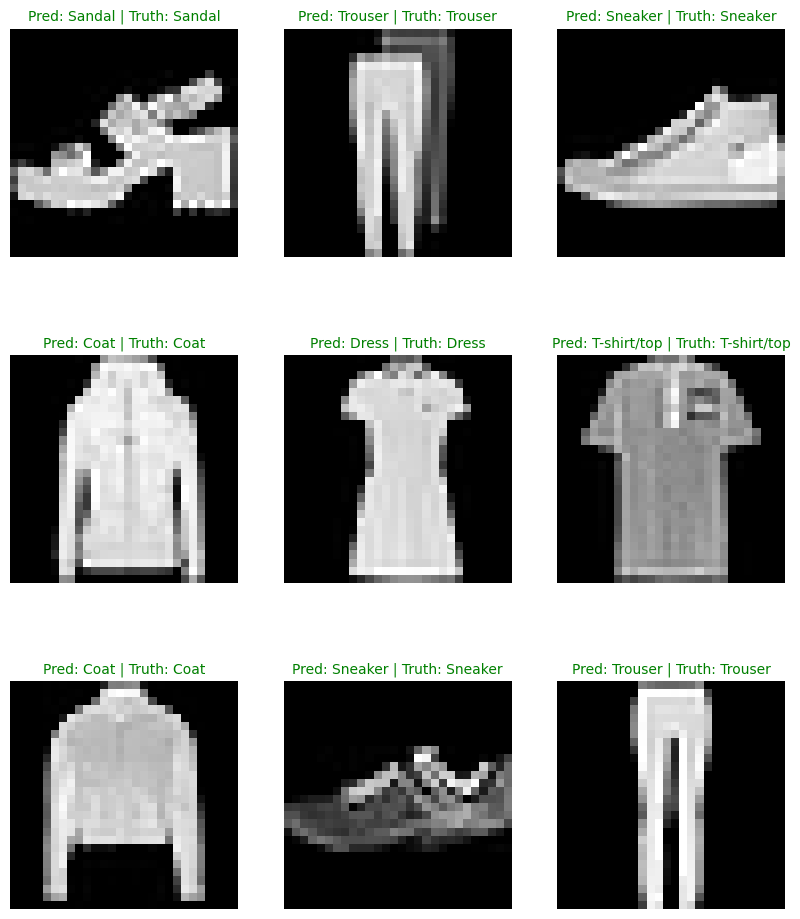

In [96]:
### now visualize the true and predicted by model 
import matplotlib.pyplot as plt

plt.figure(figsize=(10,12))

nrows = 3
ncols = 3
for i , sample in enumerate(test_sample):
    plt.subplot(nrows,ncols,i+1)
    plt.imshow(sample.squeeze(),cmap='grey')
    pred_label = class_names[pred_class[i]]
    true_label = class_names[pred_class[i]]

     # Create the title text of the plot
    title_text = f"Pred: {pred_label} | Truth: {true_label}"
    
    # Check for equality and change title colour accordingly
    if pred_label == true_label:
        plt.title(title_text, fontsize=10, c="g") 
    else:
        plt.title(title_text, fontsize=10, c="r") 
    plt.axis(False)

In [99]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions: 100%|██████████| 313/313 [00:02<00:00, 147.53it/s]


## matrix for further prediction evaluation

In [98]:
import torchmetrics, mlxtend
print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1


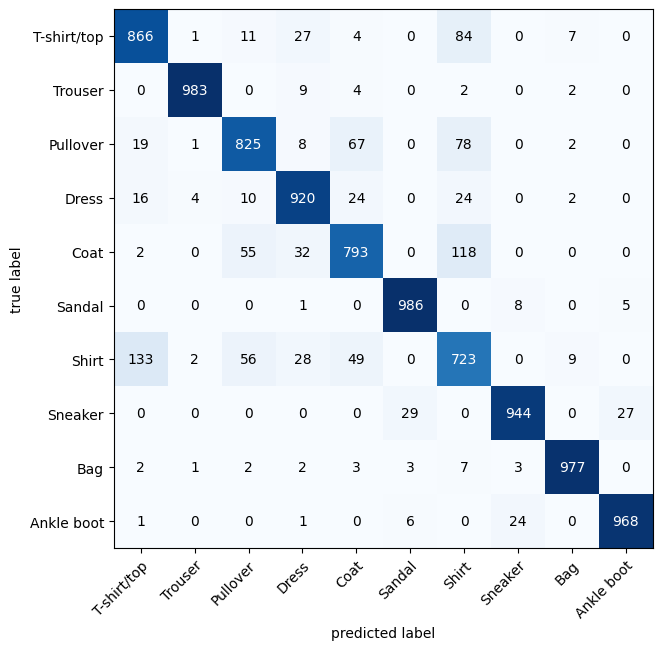

In [100]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

## Save and load best performing model

In [103]:
from os import path
from pathlib import Path
model_path = Path('Models')
model_path.mkdir(parents = True,
                 exist_ok = True
                 )
model_name = "pytorch_computer_vision_model_2.pth"
model_save_path = model_path/model_name
print(f"Best model Parameters save at {model_save_path}")
torch.save(model_2.state_dict(),
            model_save_path)


Best model Parameters save at Models\pytorch_computer_vision_model_2.pth


## Now loading back to nootboook to verify its working as original model or not 

In [104]:
## creating new instance to not take the advantages of previous model 
loaded_model_2 = fashionmnistmodelv2(input_shape=1,output_shape=10,hidden_unit=10)
loaded_model_2.load_state_dict(torch.load(model_save_path))

##Send back to gpu 
loaded_model_2.to(device)


fashionmnistmodelv2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [112]:
## evaluate the loaded model 
loaded_model_2_result = model_eval_device(model=loaded_model_2,
                                          data_loader=test_dataloader,
                                          accuracy_fn=accuracy_fn,
                                          optimizer=optimizer,
                                          loss_fn=loss_fn,
                                          device=device
                                          )
loaded_model_2_result

{'model_name': 'fashionmnistmodelv2',
 'model_loss': 0.2910177409648895,
 'model_acc': 89.83626198083067}

In [109]:
model_2_result

{'model_name': 'fashionmnistmodelv2',
 'model_loss': 0.2910177409648895,
 'model_acc': 89.83626198083067}

In [113]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(loaded_model_2_result["model_loss"]), 
              torch.tensor(model_2_result["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)